In [2]:
%plot --format svg

# Optimization

Many problems involve finding a minimum or maximum based on given constraints. Engineers and scientists typically use energy balance equations to find the conditions of minimum energy, but this value may never go to 0 and the actual value of energy may not be of interest. 

The Lennard-Jones potential is commonly used to model interatomic bonding. 

$E_{LJ}(x)=4\epsilon \left(\left(\frac{\sigma}{x}\right)^{12}-\left(\frac{\sigma}{x}\right)^{6}\right)$

Considering a 1-D gold chain, we can calculate the bond length, $x_{b}$, with no force applied to the chain and even for tension, F. This will allow us to calculate the nonlinear spring constant of a 1-D gold chain. 

![TEM image of Gold chain](au_chain.jpg)

Computational Tools to Study and Predict the Long-Term Stability of Nanowires.
By Martin E. Zoloff Michoff, Patricio Vélez, Sergio A. Dassie and Ezequiel P. M. Leiva 

![Model of Gold chain, from molecular dynamics simulation](Auchain_model.gif)

[Single atom gold chain mechanics](http://www.uam.es/personal_pdi/ciencias/agrait/)

### First, let's find the minimum energy $\min(E_{LJ}(x))$

## Brute force

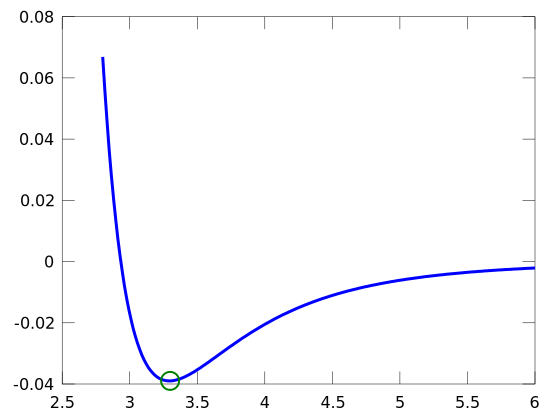

In [3]:
setdefaults
epsilon = 0.039; % kcal/mol
sigma = 2.934; % Angstrom
x=linspace(2.8,6,200); % bond length in Angstrom

Ex = lennard_jones(x,sigma,epsilon);

[Emin,imin]=min(Ex);

plot(x,Ex,x(imin),Emin,'o')

In [4]:
x(imin-1)
x(imin)
x(imin+1)

ans =  3.2824
ans =  3.2985
ans =  3.3146


## Golden Search Algorithm

We can't just look for a sign change for the problem (unless we can take a derivative) so we need a new approach to determine whether we have a maximum between the two bounds.

Rather than using the midpoint of initial bounds, here the problem is more difficult. We need to compare the values of 4 function evaluations. The golden search uses the golden ratio to determine two interior points. 

![golden ratio](goldenratio.png)

Start with bounds of 2.5 and 6 Angstrom. 

current_min = -0.019959


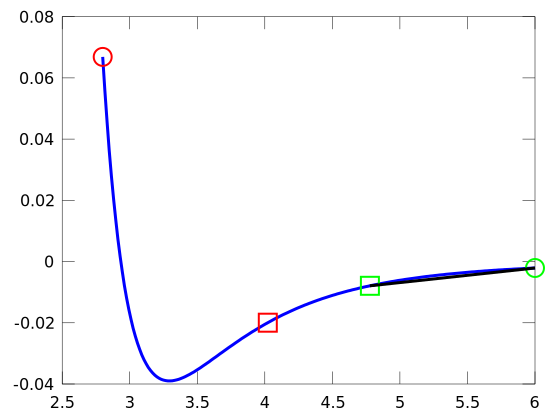

In [5]:
% define Au atomic potential
epsilon = 0.039; % kcal/mol
sigma = 2.934; % Angstrom
Au_x= @(x) lennard_jones(x,sigma,epsilon);

% calculate golden ratio
phi = 1/2+sqrt(5)/2;
% set initial limits
x_l=2.8; 
x_u=6; 

% Iteration #1
d=(phi-1)*(x_u-x_l);

x1=x_l+d; % define point 1
x2=x_u-d; % define point 2


% evaluate Au_x(x1) and Au_x(x2)

f1=Au_x(x1);
f2=Au_x(x2);
plot(x,Au_x(x),x_l,Au_x(x_l),'ro',x2,f2,'rs',x1,f1,'gs',x_u,Au_x(x_u),'go')
hold on;

if f2<f1
    plot([x_u,x1],[Au_x(x_u),f1],'k-')
    x_u=x1;
else 
    plot([x_l,x2],[Au_x(x_l),f2],'k-')
    x_l=x1;
end
hold off
%old_min = current_min;
current_min=min([f1,f2,Au_x(x_l),Au_x(x_u)])
%error_app=abs((current_min-old_min)/current_min)

current_min = -0.033707
error_app =  0.40787


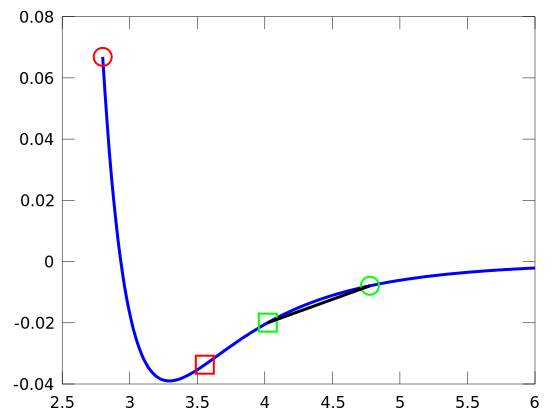

In [6]:
% Iteration #2
d=(phi-1)*(x_u-x_l);

x1=x_l+d; % define point 1
x2=x_u-d; % define point 2

% evaluate Au_x(x1) and Au_x(x2)

f1=Au_x(x1);
f2=Au_x(x2);
plot(x,Au_x(x),x_l,Au_x(x_l),'ro',x2,f2,'rs',x1,f1,'gs',x_u,Au_x(x_u),'go')
hold on;

if f2<f1
    plot([x_u,x1],[Au_x(x_u),f1],'k-')
    x_u=x1;
else 
    plot([x_l,x2],[Au_x(x_l),f2],'k-')
    x_l=x1;
end
hold off
old_min = current_min;
current_min=min([f1,f2,Au_x(x_l),Au_x(x_u)])
error_app=abs((current_min-old_min)/current_min)

current_min = -0.038904
error_app = 0


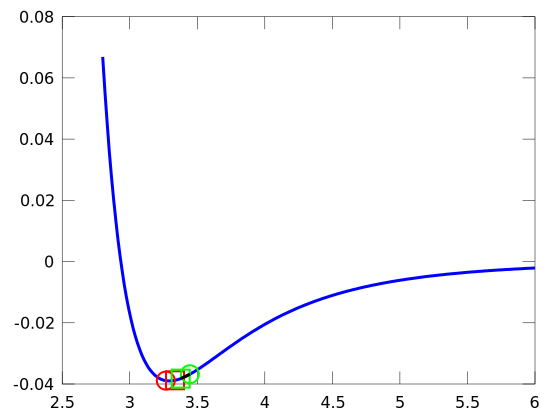

In [10]:
% Iteration #3
d=(phi-1)*(x_u-x_l);

x1=x_l+d; % define point 1
x2=x_u-d; % define point 2

% evaluate Au_x(x1) and Au_x(x2)

f1=Au_x(x1);
f2=Au_x(x2);
plot(x,Au_x(x),x_l,Au_x(x_l),'ro',x2,f2,'rs',x1,f1,'gs',x_u,Au_x(x_u),'go')
hold on;

if f2<f1
    plot([x_u,x1],[Au_x(x_u),f1],'k-')
    x_u=x1;
else 
    plot([x_l,x2],[Au_x(x_l),f2],'k-')
    x_l=x1;
end
hold off
old_min = current_min;
current_min=min([f1,f2,Au_x(x_l),Au_x(x_u)])
error_app=abs((current_min-old_min)/current_min)

current_min = -0.039000
error_app = 0


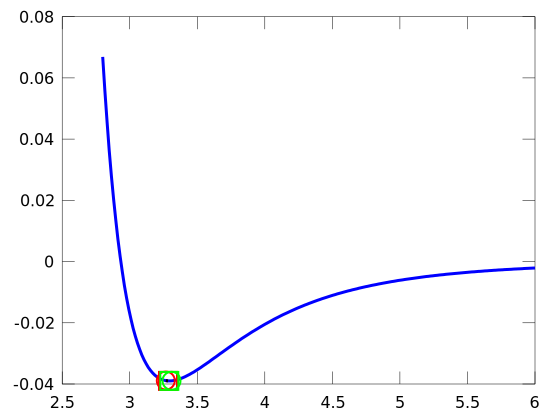

In [13]:
% Iteration #3
d=(phi-1)*(x_u-x_l);

x1=x_l+d; % define point 1
x2=x_u-d; % define point 2

% evaluate Au_x(x1) and Au_x(x2)

f1=Au_x(x1);
f2=Au_x(x2);
plot(x,Au_x(x),x_l,Au_x(x_l),'ro',x2,f2,'rs',x1,f1,'gs',x_u,Au_x(x_u),'go')
hold on;

if f2<f1
    plot([x_u,x1],[Au_x(x_u),f1],'k-')
    x_u=x1;
else 
    plot([x_l,x2],[Au_x(x_l),f2],'k-')
    x_l=x1;
end
hold off
old_min = current_min;
current_min=min([f1,f2,Au_x(x_l),Au_x(x_u)])
error_app=abs((current_min-old_min)/current_min)

## Parabolc Interpolation

Near a minimum/maximum, the function resembles a parabola. With three data points, it is possible to fit a parabola to the function. So, given a lower and upper bound, we can choose the midpoint and fit a parabola to the 3 x,f(x) coordinates. 

$ x_{4} =x_{2} - \frac{1}{2}  \frac{ \left(x_{2} -x_{1}  \right)^{2}  \left[f
 \left(x_{2}  \right)-f \left(x_{3} \right) \right]- \left(x_{2} -x_{3}  \right)^{2}
 \left[f \left(x_{2}  \right)-f \left(x_{1}  \right) \right]}{ \left(x_{2} -x_{1}  \right) \left[f \left(x_{2}  \right)-f \left(x_{3}  \right)
 \right]- \left(x_{2} -x_{3}  \right) \left[f \left(x_{2}  \right)-f \left(x_{1} \right) \right]}$

Where $x_{4}$ location of the maximum or minimum of the parabola. 

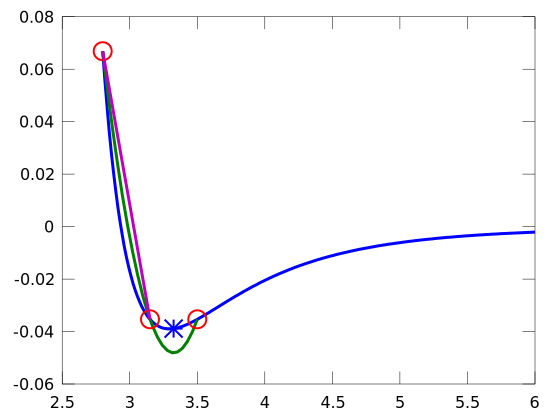

In [31]:
% define Au atomic potential
epsilon = 0.039; % kcal/mol
sigma = 2.934; % Angstrom
Au_x= @(x) lennard_jones(x,sigma,epsilon);

% set initial limits
x_l=2.8; 
x_u=3.5; 

% Iteration #1
x1=x_l;
x2=mean([x_l,x_u]);
x3=x_u;

% evaluate Au_x(x1), Au_x(x2) and Au_x(x3)
 
f1=Au_x(x1);
f2=Au_x(x2);
f3=Au_x(x3);
p = polyfit([x1,x2,x3],[f1,f2,f3],2);
x_fit = linspace(x1,x3,20);
y_fit = polyval(p,x_fit);

plot(x,Au_x(x),x_fit,y_fit,[x1,x2,x3],[f1,f2,f3],'o')
hold on
if f2<f1 && f2<f3
    x4=x2-0.5*((x2-x1)^2*(f2-f3)-(x2-x3)^2*(f2-f1))/((x2-x1)...
    *(f2-f3)-(x2-x3)*(f2-f1));
    f4=Au_x(x4);

    if x4>x2
        plot(x4,f4,'*',[x1,x2],[f1,f2])
        x1=x2;
        f1=f2;
    else
        plot(x4,f4,'*',[x3,x2],[f3,f2])
        x3=x2;
        f3=f2;
    end
    x2=x4; f2=f4;
else
    error('no minimum in bracket')
end
hold off

f3 = -0.038878


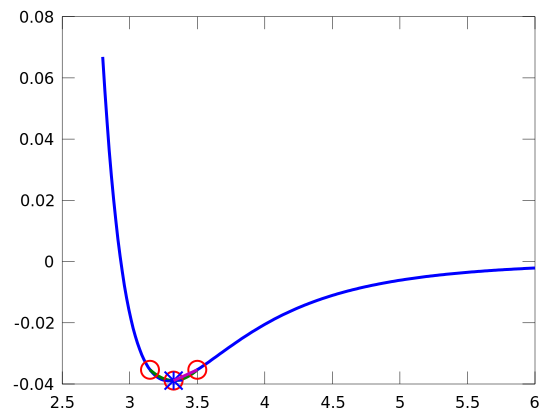

In [32]:
p = polyfit([x1,x2,x3],[f1,f2,f3],2);
x_fit = linspace(x1,x3,20);
y_fit = polyval(p,x_fit);

plot(x,Au_x(x),x_fit,y_fit,[x1,x2,x3],[f1,f2,f3],'o')
hold on
if f2<f1 && f2<f3
    x4=x2-0.5*((x2-x1)^2*(f2-f3)-(x2-x3)^2*(f2-f1))/((x2-x1)...
    *(f2-f3)-(x2-x3)*(f2-f1));
    f4=Au_x(x4);

    if x4>x2
        plot(x4,f4,'*',[x1,x2],[f1,f2])
        x1=x2;
        f1=f2;
    else
        plot(x4,f4,'*',[x3,x2],[f3,f2])
        x3=x2;
        f3=f2;
    end
    x2=x4; f2=f4;
else
    error('no minimum in bracket')
end
hold off


f3 = -0.038878


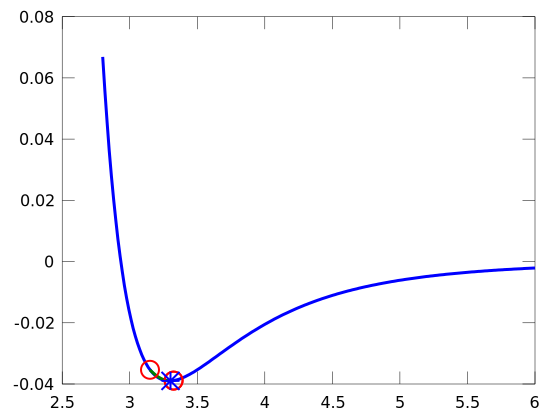

In [33]:
p = polyfit([x1,x2,x3],[f1,f2,f3],2);
x_fit = linspace(x1,x3,20);
y_fit = polyval(p,x_fit);

plot(x,Au_x(x),x_fit,y_fit,[x1,x2,x3],[f1,f2,f3],'o')
hold on
if f2<f1 && f2<f3
    x4=x2-0.5*((x2-x1)^2*(f2-f3)-(x2-x3)^2*(f2-f1))/((x2-x1)...
    *(f2-f3)-(x2-x3)*(f2-f1));
    f4=Au_x(x4);

    if x4>x2
        plot(x4,f4,'*',[x1,x2],[f1,f2])
        x1=x2;
        f1=f2;
    else
        plot(x4,f4,'*',[x3,x2],[f3,f2])
        x3=x2;
        f3=f2;
    end
    x2=x4; f2=f4;
else
    error('no minimum in bracket')
end
hold off


Parabolic interpolation does not converge in many scenarios even though it it a bracketing method. Instead, functions like `fminbnd` in Matlab and Octave use a combination of the two (Golden Ratio and Parabolic)

## Using the solutions to minimization for the nonlinear spring constant

Now, we have two routines to find minimums of a univariate function (Golden Ratio and Parabolic). Let's use these to solve for the minimum energy given a range of applied forces to the single atom gold chain

$E_{total}(\Delta x) = E_{LJ}(x_{min}+\Delta x) - F \cdot \Delta x$

In [37]:
xmin = fminbnd(Au_x,2.8,6)

Etotal = @(dx,F) Au_x(xmin+dx)-F.*dx;


xmin =  3.2933
